In [1]:
import sys
sys.path.append("../Modules/")
sys.path.append("../pyFiles/")
sys.path.append("../")
import os

import pandas as pd
import numpy as np

# from configobj import ConfigObj
# from configobj import flatten_errors
# from validate import Validator
    
import logging

# from analysisParameters import loadParameters
# from loadDataE1 import loadSessionDict

#fmt = 'logging.Formatter(''%(levelname)s_%(name)s-%(funcName)s(): - %(message)s'
fmt = '%(levelname)s_%(name)s-%(funcName)s(): - %(message)s'
logging.basicConfig(level=logging.INFO, format=fmt)
logger = logging.getLogger(__name__)



In [2]:
# sessionDict = projectTrajectories(sessionDict)
import matplotlib.pyplot as plt
%matplotlib notebook

### Save all out automoatically

In [6]:
import pickle

file = open('../sessionFiles.pickle', 'rb')
allSessions = pickle.load(file)
file.close()

[{'subID': 'AC',
  'trialInfo':     ballFinalPos                ballInitialPos                 ballInitialVel  \
                 x         y    z              x         y     z              x   
  0            NaN       NaN  NaN            NaN       NaN   NaN            NaN   
  1            NaN       NaN  NaN            NaN       NaN   NaN            NaN   
  2            NaN       NaN  NaN            NaN       NaN   NaN            NaN   
  3            NaN       NaN  NaN            NaN       NaN   NaN            NaN   
  4            NaN       NaN  NaN            NaN       NaN   NaN            NaN   
  ..           ...       ...  ...            ...       ...   ...            ...   
  190     0.471963  1.271115  0.0      -6.874928  1.468037  18.0       5.799053   
  191     0.471963  1.043855  0.0      -5.685879  0.750422  18.0       5.351886   
  192     0.314642  0.934700  0.0      -7.377218  0.907796  18.0       6.032216   
  193     0.471963  0.881228  0.0      -6.500081  1.77566

In [12]:
[(idx, session['subID'])  for idx, session in enumerate( allSessions)]

[(0, 'AC'),
 (1, 'AI'),
 (2, 'ASB'),
 (3, 'BDW'),
 (4, 'BL'),
 (5, 'CAF'),
 (6, 'CM'),
 (7, 'JL'),
 (8, 'LD'),
 (9, 'MFF'),
 (10, 'RGH'),
 (11, 'romp-f1d42c45-47a6-47b7-9cda-07ba32282dcc')]

In [4]:
# subData = gbSub.get_group(0)
# subData

sessionDict = allSessions[0]



In [5]:
list(sessionDict['trialInfo'].groupby(['blockNumber','trialNumber']) .groups)

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (3, 16),
 (3, 17),
 (3, 18),
 (3, 19),
 (3, 20),
 (3, 21),
 (3, 22),
 (3, 23),
 (3, 24),
 (3, 25),
 (3, 26),
 (3, 27),
 (3, 28),
 (3, 29),
 (3, 30),
 (3, 31),
 (3, 32),
 (3, 33),
 (3, 34),
 (3, 35),
 (3, 36),
 (3, 37),
 (3, 38),
 (3, 39),
 (3, 40),
 (3, 41),
 (3, 42),
 (3, 43),
 (3, 44),
 (3, 45),
 (3, 46),
 (3, 47),
 (3, 48),
 (3, 49),
 (3, 50),
 (3, 51),
 (3, 52),
 (3, 53),
 (3, 54),
 (3, 55),
 (3, 56),
 (3, 57),
 (3, 58),
 (3, 59),
 (3, 60),
 (3, 61),
 (3, 62),
 (3, 63),
 (3, 64),
 (3, 65),
 (3, 66),
 (3, 67),
 (3, 68),
 (3, 69),
 (3, 70),
 (3, 71),
 (3, 72),
 (3, 73),
 (3, 74),
 (3, 75),
 (3, 76),
 (3, 77),
 (3, 78),
 (3, 79),
 (3, 80),
 (3, 81),
 (3, 82),
 (3, 83),
 (3, 84),
 (3, 85),
 (3, 86),
 (3, 87),
 (3, 88),
 (3, 89),
 (3, 90),
 (3, 91),
 (3, 92),
 (3, 93),
 (3, 94),
 (3, 95),
 (3, 96),
 (3, 97),
 (3, 98),
 (3, 99),
 (3, 100),
 (3, 101

In [6]:
blNum = 2
trNumInBlock = 2

trNumAbs = list(sessionDict['trialInfo'].groupby('blockNumber').get_group(blNum)['trialNumber'])

gbData_bl_tr = sessionDict['processedExp'].groupby(['blockNumber','trialNumber']) 
gbInfo_bl_tr = sessionDict['trialInfo'].groupby(['blockNumber','trialNumber']) 

trDataGb = gbData_bl_tr.get_group( (blNum,trNumAbs[trNumInBlock]) ) 
trInfoGb = gbInfo_bl_tr.get_group( (blNum,trNumAbs[trNumInBlock]) ) 

# plotProjectedTrajectory(trDataGb,trInfoGb)

In [7]:


# gbData_bl_tr = sessionDict['processedExp'].groupby(['blockNumber','trialNumber']) 
# gbInfo_bl_tr = sessionDict['trialInfo'].groupby(['blockNumber','trialNumber']) 

# for trNumAbs, trData in gbData_bl_tr

#     trDataGb = gbData_bl_tr.get_group( (blNum,trNumAbs) ) 
#     trInfoGb = gbInfo_bl_tr.get_group( (blNum,trNumAbs) ) 

#     plotProjectedTrajectory(trDataGb,trInfoGb)

# # # plotProjectedTrajectory(trData,trInfo)

In [10]:
def plotMovementModelB(tr,
                   trInfo,
                      analysisParameters,
                  halfHFOVDegs = 80):

    import matplotlib.pyplot as plt

    p = plt.figure(figsize=(10, 15))

    plt.style.use('ggplot')

    grid = plt.GridSpec(3, 2, wspace=0.4, hspace=0.3)

    ax = p.add_subplot(grid[:2,:2])
    ax2 = p.add_subplot(grid[2,:],title='Velocity')

    ax.set(xlabel='degrees azimuth', ylabel='degrees elevation')
    ax2.set(xlabel='time (s)', ylabel='velocity (degrees/second)')

    #######

    # Calculate events
    winStartTimeMs = analysisParameters['analysisWindowStart']
    winEndTimeMs = analysisParameters['analysisWindowEnd']
    interpResS = analysisParameters['interpResS']

    trialTime_fr = np.array(tr['frameTime'],np.float64) - np.array(tr['frameTime'],np.float64)[0]
    interpTime_s = np.arange(0,trialTime_fr[-1],interpResS)
    

    # Analysis should focus on the frames before ball collision or passing
    initTTC = np.float64(trInfo['ballInitialPos','z']) / -np.float64(trInfo['ballInitialVel','z'])
    
    endFrameIdx = np.where( trialTime_fr > initTTC )[0][0]
    lastTrajFrame = np.min([int(endFrameIdx),
               int(trInfo[('passVertPlaneAtPaddleFr', '')])])

    analysisTime_fr = np.array(tr['frameTime'],np.float64)[:lastTrajFrame] - np.array(tr['frameTime'],np.float64)[0]

    # Interpolate

    interpBallAz_s = np.interp(interpTime_s,analysisTime_fr,np.array(tr['ball_az'][:lastTrajFrame],dtype=np.float64))
    interpBallEl_s = np.interp(interpTime_s,analysisTime_fr,np.array(tr['ball_el'][:lastTrajFrame],dtype=np.float64))

    interpGazeAz_s = np.interp(interpTime_s,analysisTime_fr,np.array(tr['cycGIWFilt_az'][:lastTrajFrame],dtype=np.float64))
    interpGazeEl_s = np.interp(interpTime_s,analysisTime_fr,np.array(tr['cycGIWFilt_el'][:lastTrajFrame],dtype=np.float64))

    cycToBallVelAz_s = np.interp(interpTime_s,analysisTime_fr,np.array(tr['ballVel_az'][:lastTrajFrame],dtype=np.float64))
    cycToBallVelEl_s = np.interp(interpTime_s,analysisTime_fr,np.array(tr['ballVel_el'][:lastTrajFrame],dtype=np.float64))

    ballRadiusDegs_s = np.interp(interpTime_s,analysisTime_fr,np.array(tr['ballRadiusDegs'][:lastTrajFrame],dtype=np.float64))

    gazeVelFilt_s = np.interp(interpTime_s,analysisTime_fr,tr['gazeVelFilt'][:lastTrajFrame])

    ########################################
    #### Interpolated event times

    # Win start/end relative to initial TTC
    winStartSampleIdx = np.where( interpTime_s > initTTC + winStartTimeMs/1000.0 )[0][0]
    winEndSampleIdx = np.where( interpTime_s > initTTC + winEndTimeMs/1000.0 )[0][0] - 1

    passingTime = trialTime_fr[int(trInfo[('passVertPlaneAtPaddleFr', '')])]
    passingSampleIdx = np.where( interpTime_s > passingTime)[0][0]

    # If passing sample idx < window end, raise error
    if( passingSampleIdx < winEndSampleIdx):
        logger.warn('Ball collision occurs within analysis window!')

    # Find where the ball / gaze actually ended up
    ballWinStart_AzEl = [interpBallAz_s[winStartSampleIdx], interpBallEl_s[winStartSampleIdx]]
    ballWinEnd_AzEl = [interpBallAz_s[winEndSampleIdx], interpBallEl_s[winEndSampleIdx]]
    gazeWinStart_AzEl = [interpGazeAz_s[winStartSampleIdx], interpGazeEl_s[winStartSampleIdx]]
    gazeWinEnd_AzEl = [interpGazeAz_s[winEndSampleIdx], interpGazeEl_s[winEndSampleIdx]]


    #######

    initTTC = np.float64(trInfo['ballInitialPos','z']) / -np.float64(trInfo['ballInitialVel','z'])
    endSampleIdx = np.where( interpTime_s > initTTC )[0][0]-1

    # Win start/end
    winStartSampleIdx = np.where( interpTime_s > initTTC + winStartTimeMs/1000.0 )[0][0]
    winEndSampleIdx = np.where( interpTime_s > initTTC + winEndTimeMs/1000.0 )[0][0] -1

    if( passingSampleIdx < winEndSampleIdx):
        winEndSampleIdx = passingSampleIdx

    windowFr = np.arange(winStartSampleIdx,winEndSampleIdx)

    ############

    halfVFOVDegs = halfHFOVDegs / 1.77


    cList = ['r','g','b']
    lineHandles = []

    ballH = ax.scatter(interpBallAz_s[:endSampleIdx],interpBallEl_s[:endSampleIdx],
                       s=3, color='b',linewidth=0,alpha = 0.4)
    gazeH = ax.scatter(interpGazeAz_s[:endSampleIdx],interpGazeEl_s[:endSampleIdx],
                       s=3, color='r',linewidth=0,alpha = 0.4)
    
#     ballH = ax.plot(interpBallAz_s[:endSampleIdx],interpBallEl_s[:endSampleIdx],color='b',linewidth=3,alpha = 0.4)
#     gazeH = ax.plot(interpGazeAz_s[:endSampleIdx],interpGazeEl_s[:endSampleIdx],color='r',linewidth=3,alpha = 0.4)

    from matplotlib import patches as pt

    # ax.add_patch(pt.Circle(ballAtWinEndVelPred_AzEl,radius=balllRadiusVel,
    #             fill=False,facecolor=None,ec='k',lw=3))

    ax.add_patch(pt.Circle(ballWinEnd_AzEl,radius=trInfo['ballRadiusWinEnd'],
                 fill=False,facecolor=None,ec='k',lw=3))

    ax.plot(interpBallAz_s[windowFr],interpBallEl_s[windowFr],color='b',linewidth=5, alpha = 0.6)
    ax.plot(interpGazeAz_s[windowFr],interpGazeEl_s[windowFr],color='r',linewidth=5,alpha = 0.6)
    
#     ax.plot(interpBallAz_s[windowFr],interpBallEl_s[windowFr],color='b',linewidth=5, alpha = 0.6)
#     ax.plot(interpGazeAz_s[windowFr],interpGazeEl_s[windowFr],color='r',linewidth=5,alpha = 0.6)

    for i in np.arange(0,len(windowFr),5):
        pf = windowFr[i]
        xs = [interpBallAz_s[pf], interpGazeAz_s[pf]]
        ys = [interpBallEl_s[pf], interpGazeEl_s[pf]]
        ax.plot(xs,ys,color='k',linewidth=1,alpha = 0.3)

    cOrM = []
    
    
    if (trInfo['isCaughtQ'].values == True):

        cOrM = ax.scatter(tr['ball_az'].iloc[lastTrajFrame-1],
                          tr['ball_el'].iloc[lastTrajFrame-1],
                          c='g',s=120,marker='8',lw=6)
    else:

        cOrM = ax.scatter(tr['ball_az'].iloc[lastTrajFrame-1],
                          tr['ball_el'].iloc[lastTrajFrame-1],
                          c='r',s=150,marker='8',lw=6)

    ax.axis('equal')
    ax.set_aspect('equal')
    ax.axes.spines['top'].set_visible(False)
    ax.axes.spines['right'].set_visible(False)
    ax.axes.yaxis.grid(True)
    ax.axes.xaxis.grid(True)
    p.set_facecolor('w')

    plt.xlim([-30,30])
    plt.ylim([-15,35])

    observedH = ax.scatter(ballWinEnd_AzEl[0],ballWinEnd_AzEl[1],c='k',s=150,marker='8')
    constantVelH = ax.scatter(trInfo['ballAtWinEndVelPred_AzEl'].values[0][0],
                              trInfo['ballAtWinEndVelPred_AzEl'].values[0][1],c='k',s=150,marker='v')

    gazeLoc = ax.scatter(trInfo['gazeMinDistLoc_AzEl'].values[0][0],
                         trInfo['gazeMinDistLoc_AzEl'].values[0][1],c='m',s=150,marker='x',lw=6)

    ax.text(.01,.01,str('NormLoc: {:.2}').format(trInfo['normLocInWindow'].values[0]),transform=ax.transAxes)
#     ax.text(.01,.04,str('IPD Ratio: {}').format(float(trInfo['ipdRatio'].values)),transform=ax.transAxes)
    ax.text(.01,.07,str('Sub: {} Bl: {} Tr: {}').format(
        int(trInfo['subjectNumber']),
        int(trInfo['blockNumber']),
        int(trInfo['trialNumber'])
    ),transform=ax.transAxes)

    ax.legend([gazeLoc,
               constantVelH,
               observedH,
               cOrM],

              ['point nearest to gaze',
               'constant speed model',
               'actual displacement',
              'green=catch, red=miss'])


    #######################################################
    #######################################################
    ## Velocity

    trialTime_fr = np.array(tr['frameTime'] - tr['frameTime'].iloc[0])
    initTTC = np.float64(trInfo['ballInitialPos','z']) / -np.float64(trInfo['ballInitialVel','z'])

    winStartTimeMs = analysisParameters['analysisWindowStart']
    winEndTimeMs = analysisParameters['analysisWindowEnd']

    winStartFrameIdx = np.where( trialTime_fr > initTTC + winStartTimeMs/1000.0 )[0][0]
    winEndFrameIdx = np.where( trialTime_fr > initTTC + winEndTimeMs/1000.0 )[0][0] -1

    frameOfPassage = int(trInfo['passVertPlaneAtPaddleFr'])

    ax2.set_ylim([0,150])
    ax2.set_xlim(trialTime_fr[0],trialTime_fr[frameOfPassage])

    gazeVel = ax2.plot(trialTime_fr,
            tr['gazeVelFilt']
            ,color='r',linewidth=3,alpha = .5,label='gazeVel')


    ballCenter = ax2.plot(trialTime_fr,
            tr['ballVel2D_fr']
            ,color='b',linewidth=3,alpha = 0.5,label='ball center')

    ballLeading = ax2.plot(trialTime_fr,
            tr['ballVelLeadingEdge']
            ,color='k',linewidth=3,alpha = 0.4,label='ball leading')

    ballTrailing = ax2.plot(trialTime_fr,
            tr['ballVelTrailingEdge']
            ,color='k',linewidth=3,alpha = 0.4,label='ball trailing')

    ax2.axvspan(trialTime_fr[winStartFrameIdx], trialTime_fr[winEndFrameIdx], color='LightSeaGreen', alpha=0.5)

    ax2.legend()

    #######################

#     ax3 = ax2.twinx()  # instantiate a second axes that shares the same x-axis
#     ax3.set_ylim([-1,1])

#     ratio = ax3.plot(trialTime_fr,
#             tr['gazeVelRelBallEdges']
#             ,color='y',linewidth=3,alpha = 0.4,label='ratio')

#     ax3.axhline( 1 )
#     ax3.axhline( .5 )
#     ax3.axhline( 0 )
#     ax3.legend()

    return(p,ax)


<IPython.core.display.Javascript object>


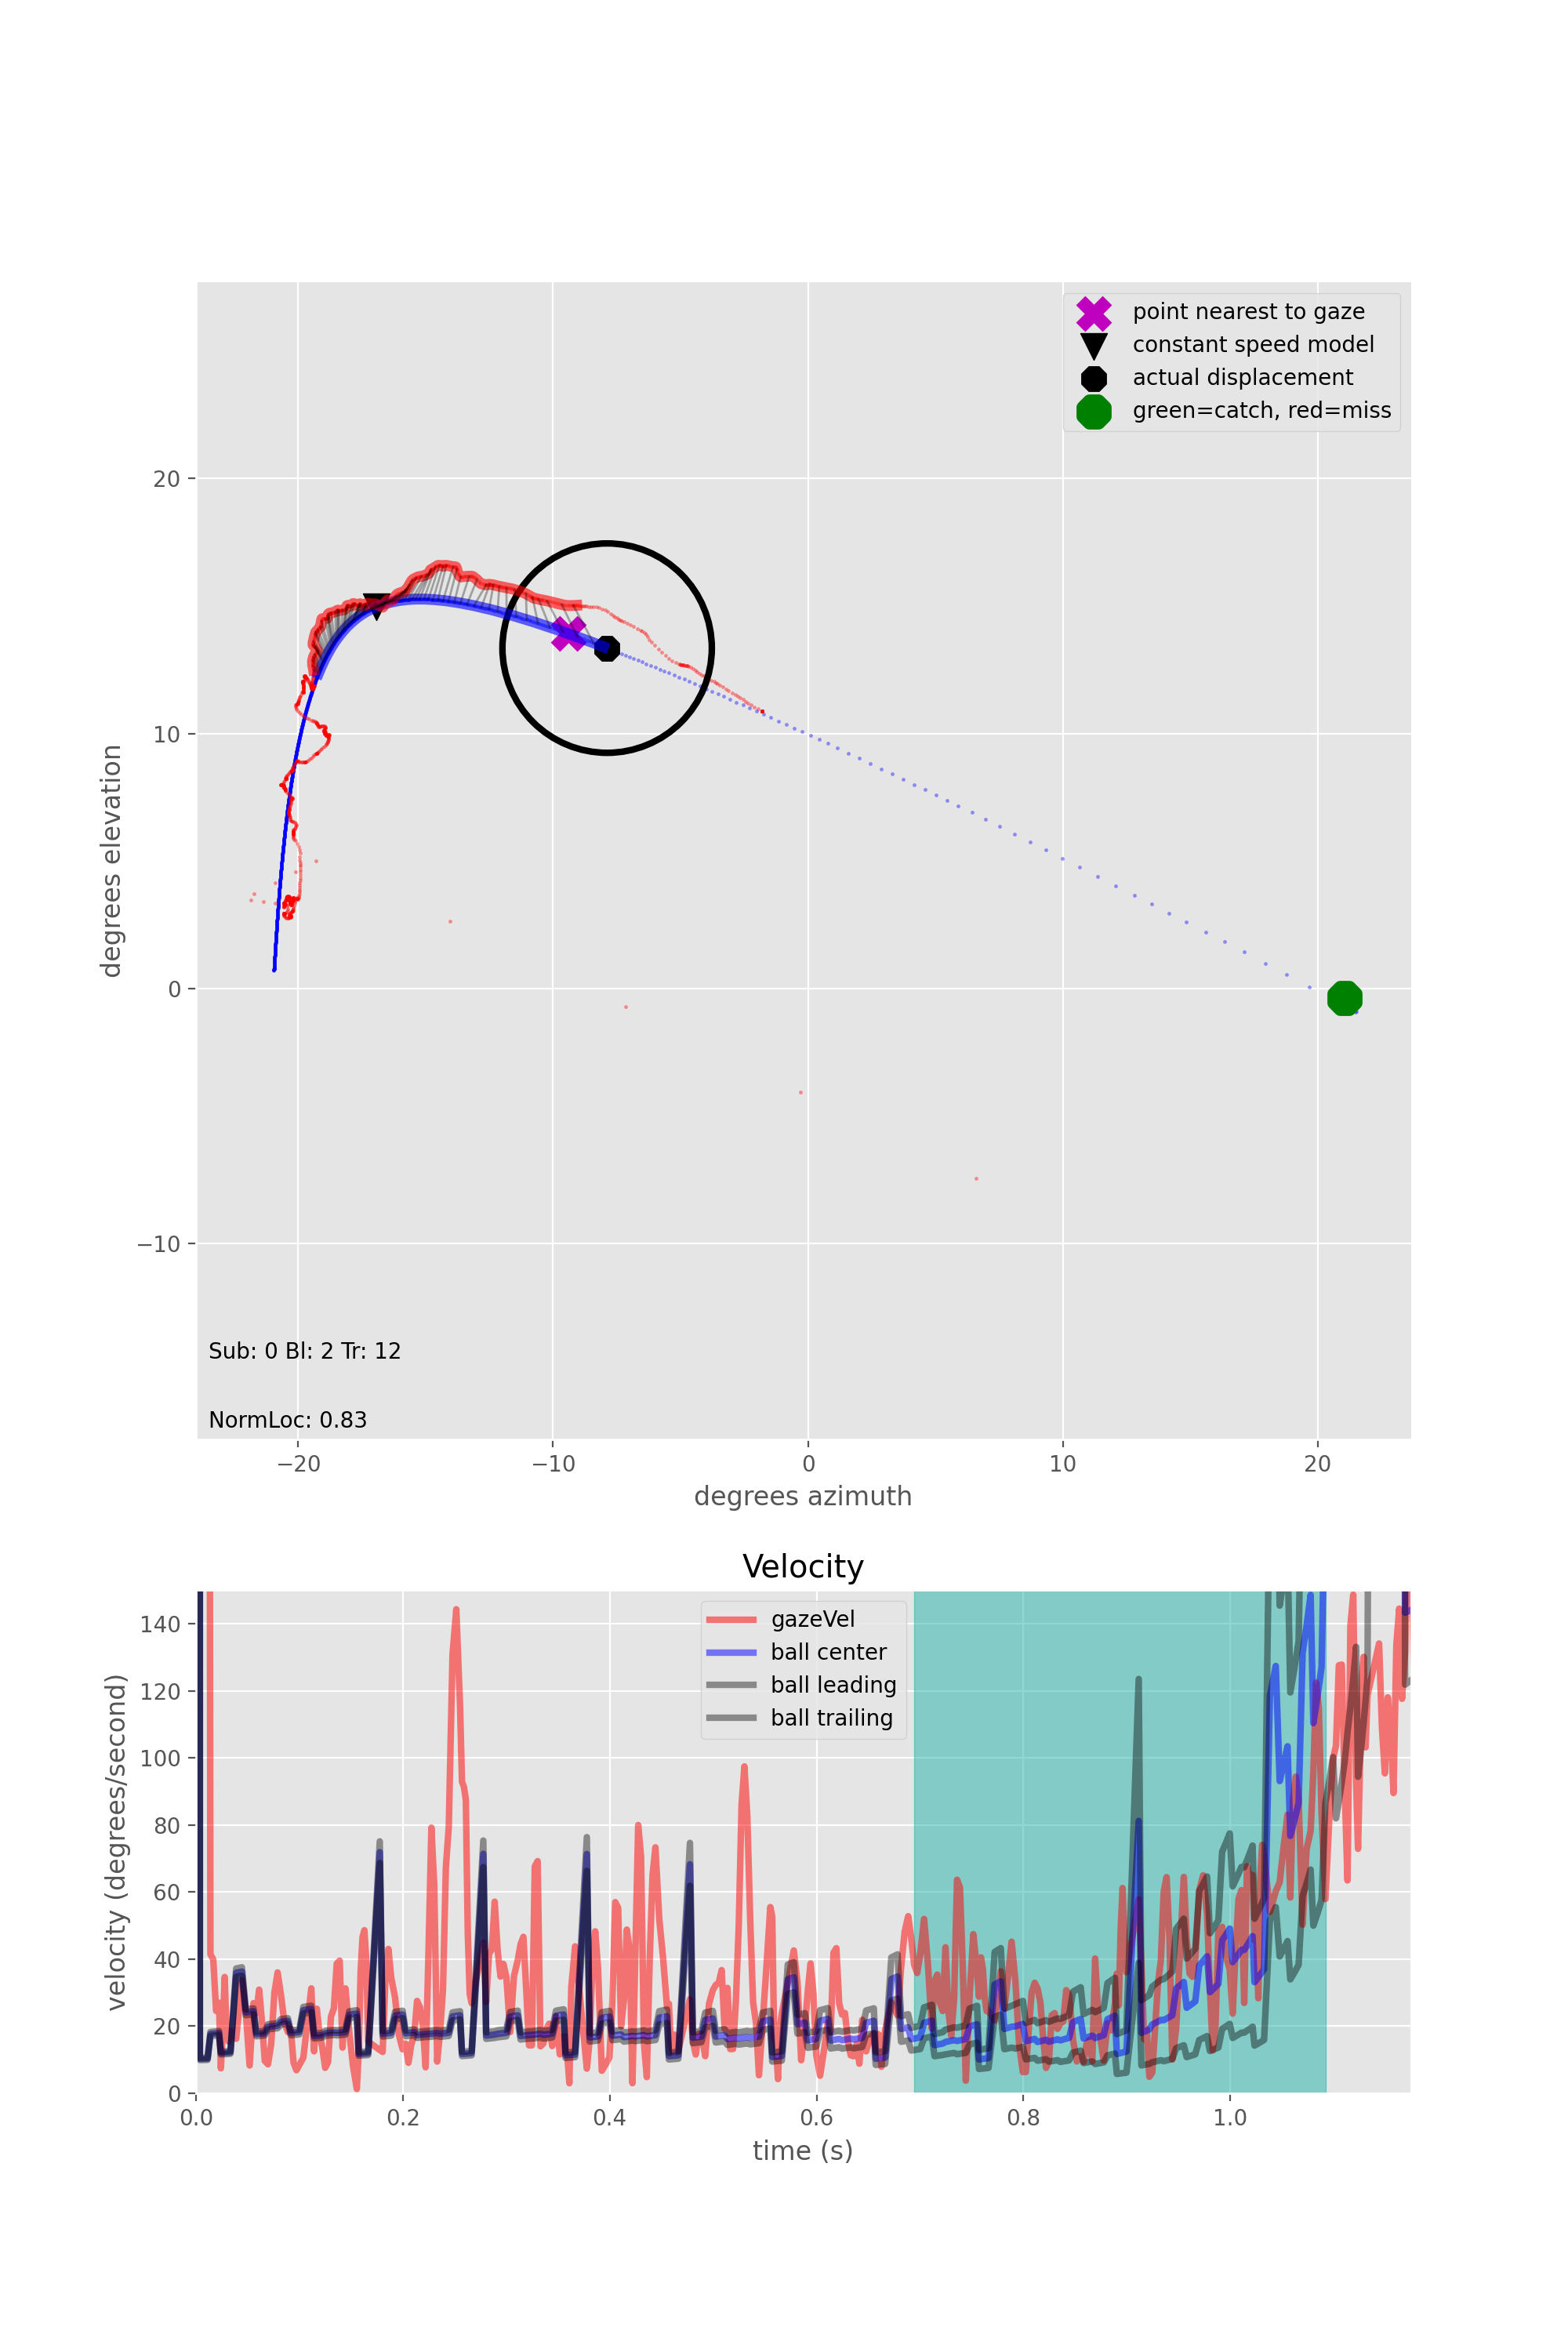

(<Figure size 1000x1500 with 2 Axes>,
 <AxesSubplot:xlabel='degrees azimuth', ylabel='degrees elevation'>)

In [11]:
blNum = 2
trNumInBlock = 2

trNumAbs = list(sessionDict['trialInfo'].groupby('blockNumber').get_group(blNum)['trialNumber'])

gbData_bl_tr = sessionDict['processedExp'].groupby(['blockNumber','trialNumber']) 
gbInfo_bl_tr = sessionDict['trialInfo'].groupby(['blockNumber','trialNumber']) 

trDataGb = gbData_bl_tr.get_group( (blNum,trNumAbs[trNumInBlock]) ) 
trInfoGb = gbInfo_bl_tr.get_group( (blNum,trNumAbs[trNumInBlock]) ) 

# plotProjectedTrajectory(trDataGb,trInfoGb)

plotMovementModelB(trDataGb,trInfoGb,sessionDict['analysisParameters'],halfHFOVDegs=60)

In [14]:
def filterAndDiffGazeSignals(sessionDict,colName):
    
    analysisParameters = sessionDict['analysisParameters']

    sgWinSizeSamples = analysisParameters['sgWinSizeSamples']
    sgPolyorder = analysisParameters['sgPolyorder']
    medFiltSize = analysisParameters['medFiltSize']
    interpResS = analysisParameters['interpResS']
    sgWinSizeSamples = analysisParameters['sgWinSizeSamples']

    from scipy.signal import savgol_filter

    # FIlter
    proc = sessionDict[colName]

    frameDur = np.float64(proc['frameTime'].diff().mode()[0])
    
    proc['cycGIWFilt_az'] = proc['cycGIW_az'].rolling(medFiltSize).median()
    proc['cycGIWFilt_el'] = proc['cycGIW_el'].rolling(medFiltSize).median()
    proc['cycGIWFilt_az'] = proc['cycGIW_az'].fillna(0)
    proc['cycGIWFilt_el'] = proc['cycGIW_el'].fillna(0)
    
    proc['cycGIWFilt_az'] = savgol_filter(proc['cycGIWFilt_az'],
                                                          sgWinSizeSamples,
                                                          sgPolyorder,
                                                          deriv=0,
                                                          delta = frameDur,
                                                          axis=0,
                                                          mode='interp')

    proc['cycGIWFilt_el'] = savgol_filter(proc['cycGIWFilt_el'],
                                                          sgWinSizeSamples,
                                                          sgPolyorder,
                                                          deriv=0,
                                                          delta = frameDur,
                                                          axis=0,
                                                          mode='interp')

    gazeVelFiltAz_fr = np.diff(np.array(proc['cycGIWFilt_az'],dtype=np.float64))  / proc['frameTime'].diff()[1:]
    gazeVelFiltAz_fr = np.hstack([0 ,gazeVelFiltAz_fr])
    
    proc['gazeVelFiltAz'] = gazeVelFiltAz_fr
    
    gazeVelFiltEl_fr = np.diff(np.array(proc['cycGIWFilt_el'],dtype=np.float64)) / proc['frameTime'].diff()[1:]
    gazeVelFiltEl_fr = np.hstack([0 ,gazeVelFiltEl_fr])
    
    proc['gazeVelFiltEl'] = gazeVelFiltEl_fr

    proc['gazeVelFilt'] = np.sqrt(np.sum(np.power([gazeVelFiltAz_fr,gazeVelFiltEl_fr],2),axis=0))

    sessionDict[colName] = proc
    
    return sessionDict


def filterAndDiffBallSignals(sessionDict):
    
    analysisParameters = sessionDict['analysisParameters']

    sgWinSizeSamples = analysisParameters['sgWinSizeSamples']
    sgPolyorder = analysisParameters['sgPolyorder']
    medFiltSize = analysisParameters['medFiltSize']
    interpResS = analysisParameters['interpResS']
    sgWinSizeSamples = analysisParameters['sgWinSizeSamples']

    from scipy.signal import savgol_filter

    proc = sessionDict['processedExp']
    # Differentiate and save ball / expansion velocities

    ballVel_Az = np.diff(np.array(proc['ball_az'],dtype=np.float64)) / proc['frameTime'].diff()[1:]
    ballVel_El = np.diff(np.array(proc['ball_el'],dtype=np.float64)) / proc['frameTime'].diff()[1:]
    ballVel_fr = np.sqrt(np.sum(np.power([ballVel_Az,ballVel_El],2),axis=0))
    ballVel_fr = np.hstack([0 ,ballVel_fr])
    proc['ballVel2D_fr'] = ballVel_fr

    ballExpansionRate_fr = np.diff(2.*np.array(proc['ballRadiusDegs'],dtype=np.float64)) / proc['frameTime'].diff()[1:]
    ballExpansionRate_fr = np.hstack([0 ,ballExpansionRate_fr])
    proc['ballExpansionRate'] = ballExpansionRate_fr

    ballVelLeadingEdge_fr = ballVel_fr + ballExpansionRate_fr
    ballVelTrailingEdge_fr = ballVel_fr - ballExpansionRate_fr

    proc['ballVelLeadingEdge'] = ballVelLeadingEdge_fr
    proc['ballVelTrailingEdge'] = ballVelTrailingEdge_fr

    proc['gazeVelRelBallEdges'] = ((proc['gazeVelFilt'] - ballVelTrailingEdge_fr) / ballVelLeadingEdge_fr)

    ballVel_az = np.diff(np.array(proc['ball_az'],dtype=np.float64)) / proc['frameTime'].diff()[1:]
    proc['ballVel_az'] = np.hstack([0 ,ballVel_az])

    ballVel_el = np.diff(np.array(proc['ball_el'],dtype=np.float64)) / proc['frameTime'].diff()[1:]
    proc['ballVel_el'] = np.hstack([0 ,ballVel_az])
    
    sessionDict['processedExp'] = proc
    return sessionDict
    

In [15]:
sessionDict = filterAndDiffGazeSignals(sessionDict,'processedExp')
sessionDict = filterAndDiffBallSignals(sessionDict)


<IPython.core.display.Javascript object>


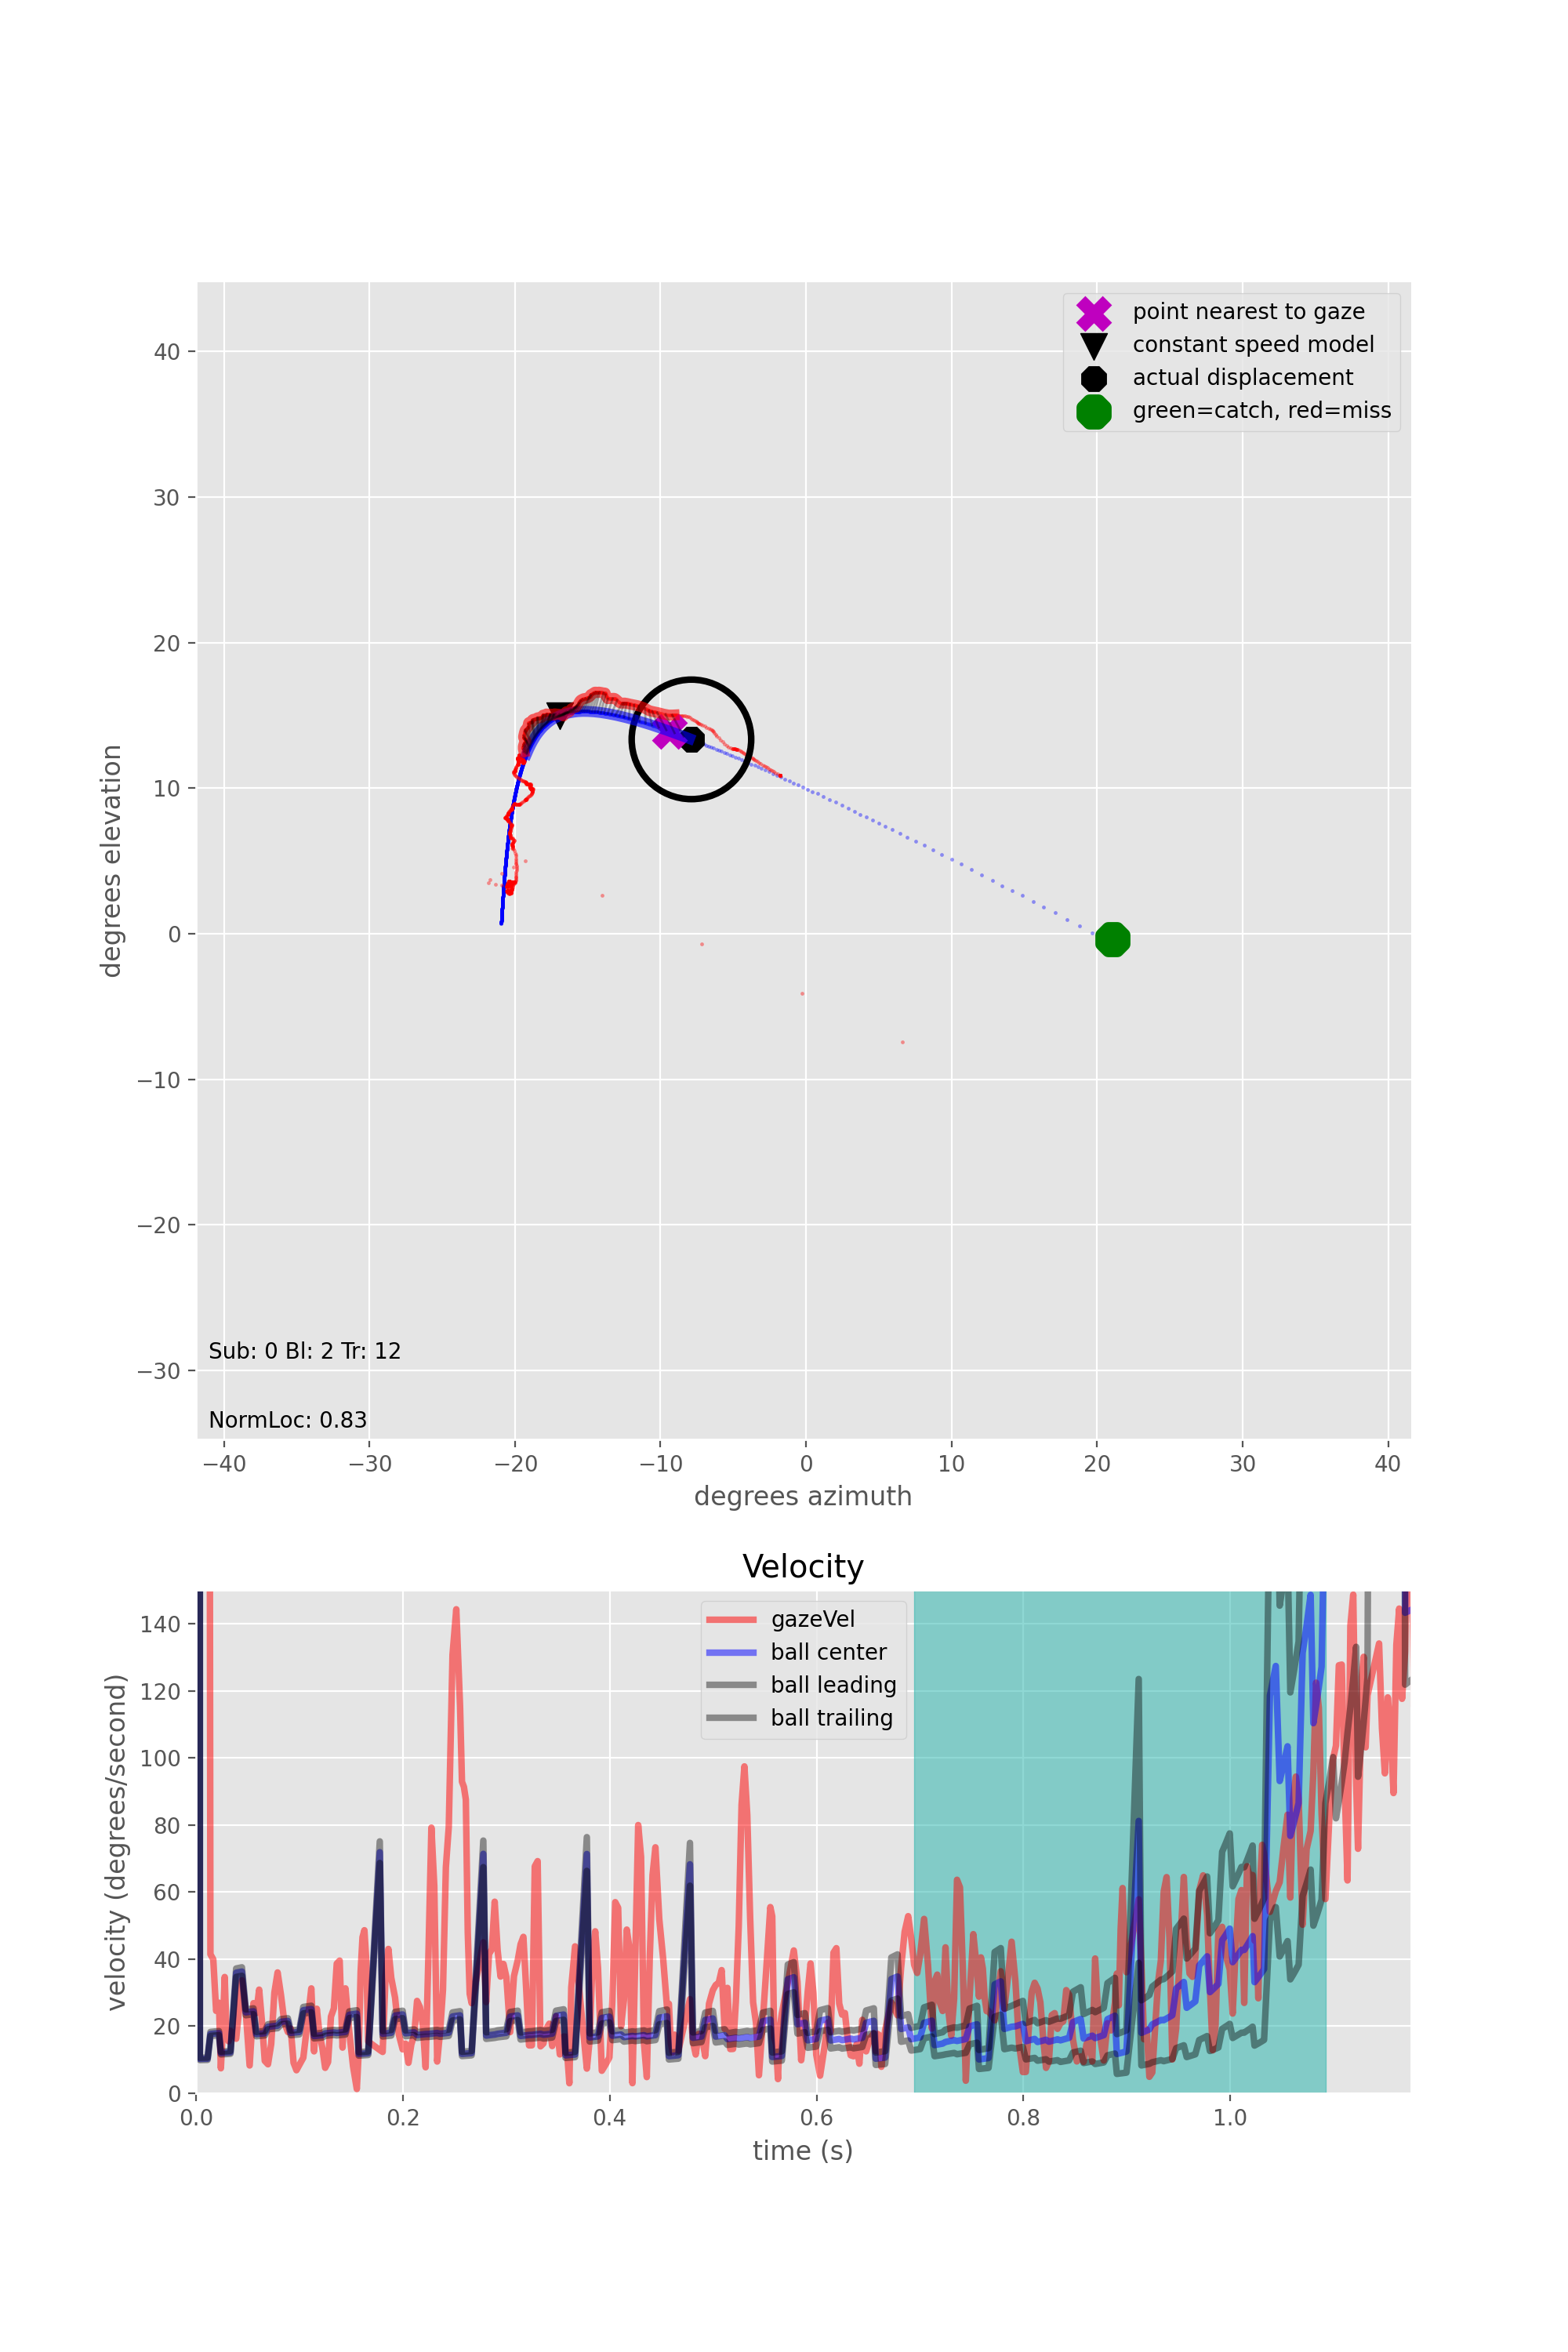

(<Figure size 1000x1500 with 2 Axes>,
 <AxesSubplot:xlabel='degrees azimuth', ylabel='degrees elevation'>)

In [16]:
plotMovementModelB(trDataGb,trInfoGb,sessionDict['analysisParameters'],halfHFOVDegs=60)

In [ ]:
# %matplotlib

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# blNum = 2
# trNumInBlock = 2

# trNumAbs = list(sessionDict['trialInfo'].groupby('blockNumber').get_group(blNum)['trialNumber'])

# gbData_bl_tr = sessionDict['processedExp'].groupby(['blockNumber','trialNumber']) 
# gbInfo_bl_tr = sessionDict['trialInfo'].groupby(['blockNumber','trialNumber']) 

# trDataGb = gbData_bl_tr.get_group( (blNum,trNumAbs[trNumInBlock]) ) 
# trInfoGb = gbInfo_bl_tr.get_group( (blNum,trNumAbs[trNumInBlock]) ) 

# proc = trDataGb

# frameDur = np.float64(proc['frameTime'].diff().mean())

# ballVel_Az = np.diff(np.array(proc['ball_az'],dtype=np.float64)) / proc['frameTime'].diff()[1:]
# ballVel_El = np.diff(np.array(proc['ball_el'],dtype=np.float64)) / proc['frameTime'].diff()[1:]
# ballVel_fr = np.sqrt(np.sum(np.power([ballVel_Az,ballVel_El],2),axis=0))
# ballVel_fr = np.hstack([0 ,ballVel_fr])
# # proc['ballVel2D_fr'] = ballVel_fr

# ax = plt.subplot(111)
# ax.plot(trDataGb['frameTime'],ballVel_fr,'r')
# ax.plot(trDataGb['frameTime'],ballVel_fr,'b')
# ax.set_ylim(0,200)
# # plot.ylim([0,200])
# # plt.ylabel('some numbers')
# plt.show()

# # ballH = ax.plot(trDataGb['frameTime'], ballVel_fr ,color='b',linewidth=3,alpha = 0.4)

In [17]:
def plotMovementModelB(tr,
                   trInfo,
                      analysisParameters,
                  halfHFOVDegs = 80):

    import matplotlib.pyplot as plt

    p = plt.figure(figsize=(10, 15))

    plt.style.use('ggplot')

    grid = plt.GridSpec(3, 2, wspace=0.4, hspace=0.3)

    ax = p.add_subplot(grid[:2,:2])
    ax2 = p.add_subplot(grid[2,:],title='Velocity')

    ax.set(xlabel='degrees azimuth', ylabel='degrees elevation')
    ax2.set(xlabel='time (s)', ylabel='velocity (degrees/second)')

    #######

    # Calculate events
    winStartTimeMs = analysisParameters['analysisWindowStart']
    winEndTimeMs = analysisParameters['analysisWindowEnd']
    interpResS = analysisParameters['interpResS']

    trialTime_fr = np.array(tr['frameTime'],np.float64) - np.array(tr['frameTime'],np.float64)[0]
    interpTime_s = np.arange(0,trialTime_fr[-1],interpResS)
    

    # Analysis should focus on the frames before ball collision or passing
    initTTC = np.float64(trInfo['ballInitialPos','z']) / -np.float64(trInfo['ballInitialVel','z'])
    
    endFrameIdx = np.where( trialTime_fr > initTTC )[0][0]
    lastTrajFrame = np.min([int(endFrameIdx),
               int(trInfo[('passVertPlaneAtPaddleFr', '')])])

    analysisTime_fr = np.array(tr['frameTime'],np.float64)[:lastTrajFrame] - np.array(tr['frameTime'],np.float64)[0]

    # Interpolate

    interpBallAz_s = np.interp(interpTime_s,analysisTime_fr,np.array(tr['ball_az'][:lastTrajFrame],dtype=np.float64))
    interpBallEl_s = np.interp(interpTime_s,analysisTime_fr,np.array(tr['ball_el'][:lastTrajFrame],dtype=np.float64))

    interpGazeAz_s = np.interp(interpTime_s,analysisTime_fr,np.array(tr['cycGIWFilt_az'][:lastTrajFrame],dtype=np.float64))
    interpGazeEl_s = np.interp(interpTime_s,analysisTime_fr,np.array(tr['cycGIWFilt_el'][:lastTrajFrame],dtype=np.float64))

    cycToBallVelAz_s = np.interp(interpTime_s,analysisTime_fr,np.array(tr['ballVel_az'][:lastTrajFrame],dtype=np.float64))
    cycToBallVelEl_s = np.interp(interpTime_s,analysisTime_fr,np.array(tr['ballVel_el'][:lastTrajFrame],dtype=np.float64))

    ballRadiusDegs_s = np.interp(interpTime_s,analysisTime_fr,np.array(tr['ballRadiusDegs'][:lastTrajFrame],dtype=np.float64))

    gazeVelFilt_s = np.interp(interpTime_s,analysisTime_fr,tr['gazeVelFilt'][:lastTrajFrame])

    ########################################
    #### Interpolated event times

    # Win start/end relative to initial TTC
    winStartSampleIdx = np.where( interpTime_s > initTTC + winStartTimeMs/1000.0 )[0][0]
    winEndSampleIdx = np.where( interpTime_s > initTTC + winEndTimeMs/1000.0 )[0][0] - 1

    passingTime = trialTime_fr[int(trInfo[('passVertPlaneAtPaddleFr', '')])]
    passingSampleIdx = np.where( interpTime_s > passingTime)[0][0]

    # If passing sample idx < window end, raise error
    if( passingSampleIdx < winEndSampleIdx):
        logger.warn('Ball collision occurs within analysis window!')

    # Find where the ball / gaze actually ended up
    ballWinStart_AzEl = [interpBallAz_s[winStartSampleIdx], interpBallEl_s[winStartSampleIdx]]
    ballWinEnd_AzEl = [interpBallAz_s[winEndSampleIdx], interpBallEl_s[winEndSampleIdx]]
    gazeWinStart_AzEl = [interpGazeAz_s[winStartSampleIdx], interpGazeEl_s[winStartSampleIdx]]
    gazeWinEnd_AzEl = [interpGazeAz_s[winEndSampleIdx], interpGazeEl_s[winEndSampleIdx]]


    #######

    initTTC = np.float64(trInfo['ballInitialPos','z']) / -np.float64(trInfo['ballInitialVel','z'])
    endSampleIdx = np.where( interpTime_s > initTTC )[0][0]-1

    # Win start/end
    winStartSampleIdx = np.where( interpTime_s > initTTC + winStartTimeMs/1000.0 )[0][0]
    winEndSampleIdx = np.where( interpTime_s > initTTC + winEndTimeMs/1000.0 )[0][0] -1

    if( passingSampleIdx < winEndSampleIdx):
        winEndSampleIdx = passingSampleIdx

    windowFr = np.arange(winStartSampleIdx,winEndSampleIdx)

    ############

    halfVFOVDegs = halfHFOVDegs / 1.77


    cList = ['r','g','b']
    lineHandles = []

    ballH = ax.scatter(interpBallAz_s[:endSampleIdx],interpBallEl_s[:endSampleIdx],
                       s=3, color='b',linewidth=0,alpha = 0.4)
    gazeH = ax.scatter(interpGazeAz_s[:endSampleIdx],interpGazeEl_s[:endSampleIdx],
                       s=3, color='r',linewidth=0,alpha = 0.4)
    
#     ballH = ax.plot(interpBallAz_s[:endSampleIdx],interpBallEl_s[:endSampleIdx],color='b',linewidth=3,alpha = 0.4)
#     gazeH = ax.plot(interpGazeAz_s[:endSampleIdx],interpGazeEl_s[:endSampleIdx],color='r',linewidth=3,alpha = 0.4)

    from matplotlib import patches as pt

    # ax.add_patch(pt.Circle(ballAtWinEndVelPred_AzEl,radius=balllRadiusVel,
    #             fill=False,facecolor=None,ec='k',lw=3))

    ax.add_patch(pt.Circle(ballWinEnd_AzEl,radius=trInfo['ballRadiusWinEnd'],
                 fill=False,facecolor=None,ec='k',lw=3))

    ax.plot(interpBallAz_s[windowFr],interpBallEl_s[windowFr],color='b',linewidth=5, alpha = 0.6)
    ax.plot(interpGazeAz_s[windowFr],interpGazeEl_s[windowFr],color='r',linewidth=5,alpha = 0.6)
    
#     ax.plot(interpBallAz_s[windowFr],interpBallEl_s[windowFr],color='b',linewidth=5, alpha = 0.6)
#     ax.plot(interpGazeAz_s[windowFr],interpGazeEl_s[windowFr],color='r',linewidth=5,alpha = 0.6)

    for i in np.arange(0,len(windowFr),5):
        pf = windowFr[i]
        xs = [interpBallAz_s[pf], interpGazeAz_s[pf]]
        ys = [interpBallEl_s[pf], interpGazeEl_s[pf]]
        ax.plot(xs,ys,color='k',linewidth=1,alpha = 0.3)

    cOrM = []
    
    
    if (trInfo['isCaughtQ'].values == True):

        cOrM = ax.scatter(tr['ball_az'].iloc[lastTrajFrame-1],
                          tr['ball_el'].iloc[lastTrajFrame-1],
                          c='g',s=120,marker='8',lw=6)
    else:

        cOrM = ax.scatter(tr['ball_az'].iloc[lastTrajFrame-1],
                          tr['ball_el'].iloc[lastTrajFrame-1],
                          c='r',s=150,marker='8',lw=6)

    ax.axis('equal')
    ax.set_aspect('equal')
    ax.axes.spines['top'].set_visible(False)
    ax.axes.spines['right'].set_visible(False)
    ax.axes.yaxis.grid(True)
    ax.axes.xaxis.grid(True)
    p.set_facecolor('w')

    plt.xlim([-30,30])
    plt.ylim([-15,35])

    observedH = ax.scatter(ballWinEnd_AzEl[0],ballWinEnd_AzEl[1],c='k',s=150,marker='8')
    constantVelH = ax.scatter(trInfo['ballAtWinEndVelPred_AzEl'].values[0][0],
                              trInfo['ballAtWinEndVelPred_AzEl'].values[0][1],c='k',s=150,marker='v')

    gazeLoc = ax.scatter(trInfo['gazeMinDistLoc_AzEl'].values[0][0],
                         trInfo['gazeMinDistLoc_AzEl'].values[0][1],c='m',s=150,marker='x',lw=6)

    ax.text(.01,.01,str('NormLoc: {:.2}').format(trInfo['normLocInWindow'].values[0]),transform=ax.transAxes)
#     ax.text(.01,.04,str('IPD Ratio: {}').format(float(trInfo['ipdRatio'].values)),transform=ax.transAxes)
    ax.text(.01,.07,str('Sub: {} Bl: {} Tr: {}').format(
        int(trInfo['subjectNumber']),
        int(trInfo['blockNumber']),
        int(trInfo['trialNumber'])
    ),transform=ax.transAxes)

    ax.legend([gazeLoc,
               constantVelH,
               observedH,
               cOrM],

              ['point nearest to gaze',
               'constant speed model',
               'actual displacement',
              'green=catch, red=miss'])


    #######################################################
    #######################################################
    ## Velocity

    trialTime_fr = np.array(tr['frameTime'] - tr['frameTime'].iloc[0])
    initTTC = np.float64(trInfo['ballInitialPos','z']) / -np.float64(trInfo['ballInitialVel','z'])

    winStartTimeMs = analysisParameters['analysisWindowStart']
    winEndTimeMs = analysisParameters['analysisWindowEnd']

    winStartFrameIdx = np.where( trialTime_fr > initTTC + winStartTimeMs/1000.0 )[0][0]
    winEndFrameIdx = np.where( trialTime_fr > initTTC + winEndTimeMs/1000.0 )[0][0] -1

    frameOfPassage = int(trInfo['passVertPlaneAtPaddleFr'])

    ax2.set_ylim([0,150])
    ax2.set_xlim(trialTime_fr[0],trialTime_fr[frameOfPassage])

    gazeVel = ax2.plot(trialTime_fr,
            tr['gazeVelFilt']
            ,color='r',linewidth=3,alpha = .5,label='gazeVel')


    ballCenter = ax2.plot(trialTime_fr,
            tr['ballVel2D_fr']
            ,color='b',linewidth=3,alpha = 0.5,label='ball center')

    ballLeading = ax2.plot(trialTime_fr,
            tr['ballVelLeadingEdge']
            ,color='k',linewidth=3,alpha = 0.4,label='ball leading')

    ballTrailing = ax2.plot(trialTime_fr,
            tr['ballVelTrailingEdge']
            ,color='k',linewidth=3,alpha = 0.4,label='ball trailing')

    ax2.axvspan(trialTime_fr[winStartFrameIdx], trialTime_fr[winEndFrameIdx], color='LightSeaGreen', alpha=0.5)

    ax2.legend()

    #######################

#     ax3 = ax2.twinx()  # instantiate a second axes that shares the same x-axis
#     ax3.set_ylim([-1,1])

#     ratio = ax3.plot(trialTime_fr,
#             tr['gazeVelRelBallEdges']
#             ,color='y',linewidth=3,alpha = 0.4,label='ratio')

#     ax3.axhline( 1 )
#     ax3.axhline( .5 )
#     ax3.axhline( 0 )
#     ax3.legend()

    return(p,ax)



<IPython.core.display.Javascript object>


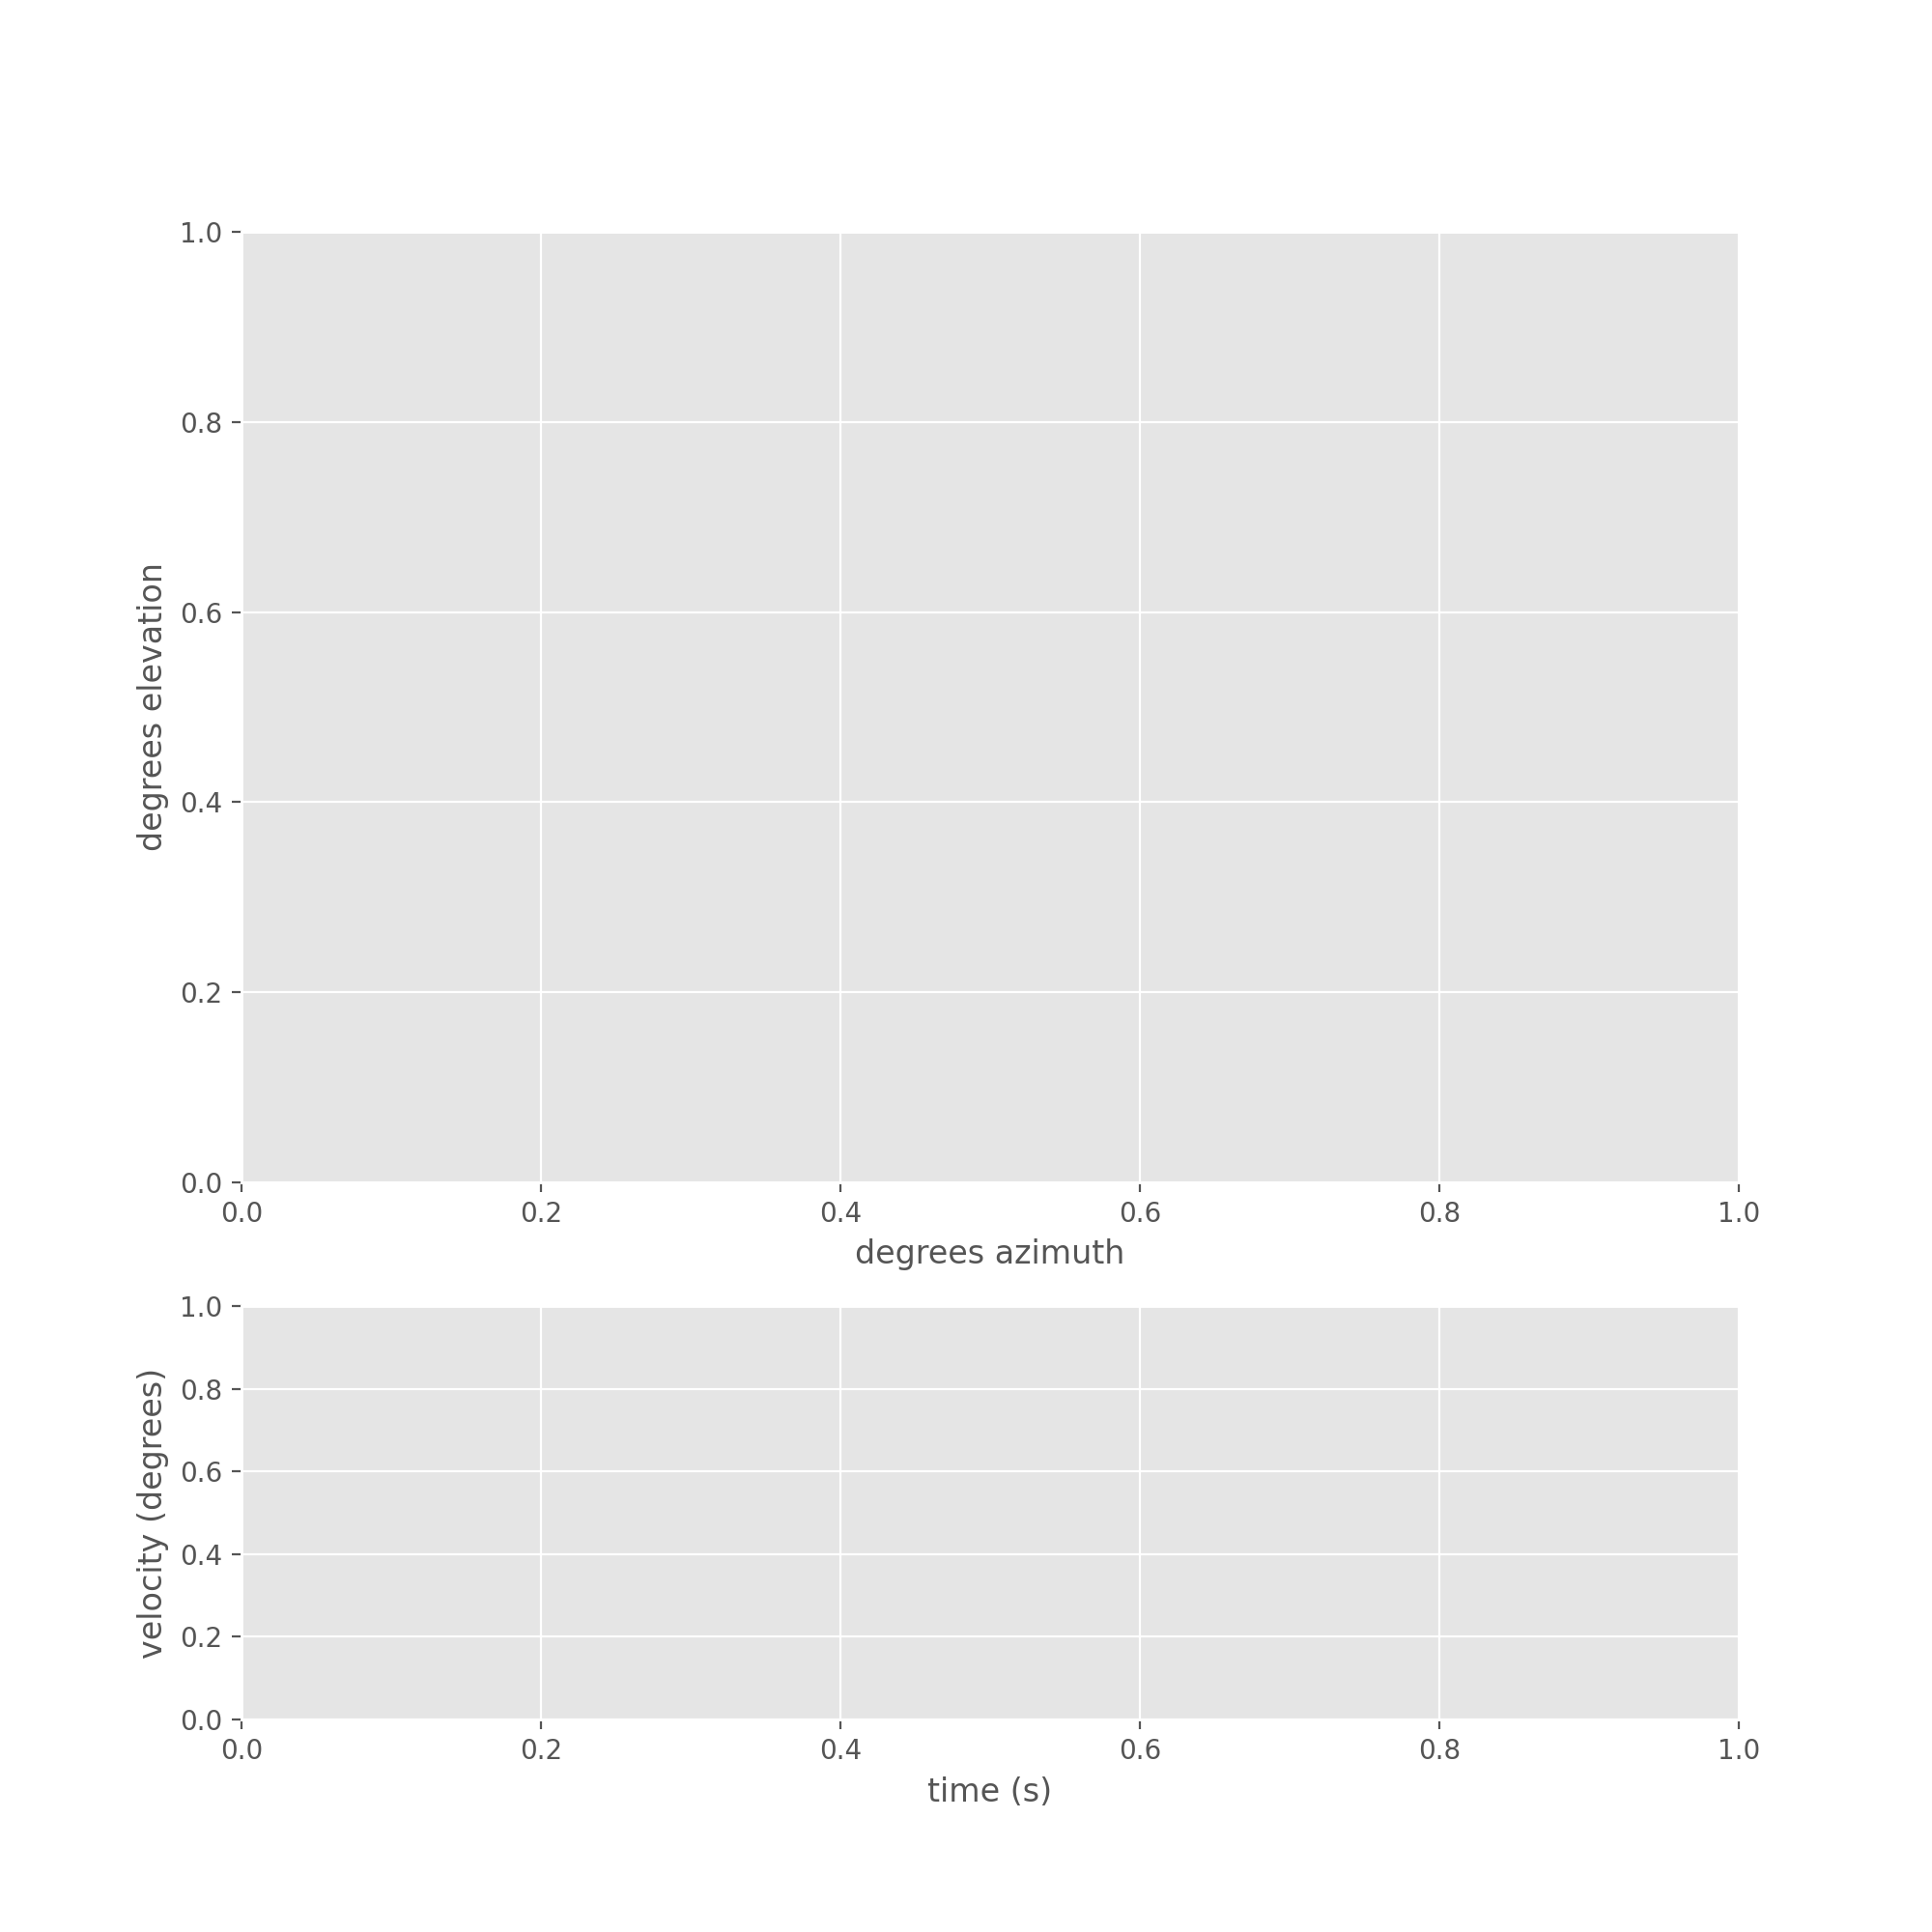

/var/folders/gy/wzd471c14k762xp4b_xt87xr0000gq/T/ipykernel_79140/4255658099.py:24: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  trialTime_fr = np.array(tr['frameTime'],np.float) - np.array(tr['frameTime'],np.float)[0]


KeyError: ('ballInitialPos', 'Z')

In [20]:
plotMovementModel(trDataGb,trInfoGb,sessionDict['analysisParameters'],halfHFOVDegs=60)